In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

624

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hobart
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | madona
Processing Record 4 of Set 1 | atar
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | coihaique
Processing Record 7 of Set 1 | boden
Processing Record 8 of Set 1 | tawau
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | richards bay
Processing Record 11 of Set 1 | kununurra
Processing Record 12 of Set 1 | barrow
Processing Record 13 of Set 1 | fort nelson
Processing Record 14 of Set 1 | kedrovyy
Processing Record 15 of Set 1 | vila franca do campo
Processing Record 16 of Set 1 | hermanus
Processing Record 17 of Set 1 | lebu
Processing Record 18 of Set 1 | kemijarvi
Processing Record 19 of Set 1 | messina
Processing Record 20 of Set 1 | hilo
Processing Record 21 of Set 1 | otane
Processing Record 22 of Set 1 | tuatapere
Processing Record 23 of Set 1 | puerto ayora
Processing 

Processing Record 36 of Set 4 | bridlington
Processing Record 37 of Set 4 | talnakh
Processing Record 38 of Set 4 | pevek
Processing Record 39 of Set 4 | portland
Processing Record 40 of Set 4 | lorengau
Processing Record 41 of Set 4 | russell
Processing Record 42 of Set 4 | vimperk
Processing Record 43 of Set 4 | chapayevka
Processing Record 44 of Set 4 | bengkulu
Processing Record 45 of Set 4 | kharsia
Processing Record 46 of Set 4 | san patricio
Processing Record 47 of Set 4 | ambilobe
Processing Record 48 of Set 4 | inuvik
Processing Record 49 of Set 4 | hit
Processing Record 50 of Set 4 | san jose
Processing Record 1 of Set 5 | lukovetskiy
Processing Record 2 of Set 5 | moron
Processing Record 3 of Set 5 | qaanaaq
Processing Record 4 of Set 5 | kungsbacka
Processing Record 5 of Set 5 | seoul
Processing Record 6 of Set 5 | ugoofaaru
Processing Record 7 of Set 5 | christchurch
Processing Record 8 of Set 5 | hailar
Processing Record 9 of Set 5 | okhotsk
Processing Record 10 of Set 5 

Processing Record 26 of Set 8 | nalut
Processing Record 27 of Set 8 | chor
Processing Record 28 of Set 8 | marienburg
Processing Record 29 of Set 8 | nanortalik
Processing Record 30 of Set 8 | hami
Processing Record 31 of Set 8 | hanyang
Processing Record 32 of Set 8 | aipe
Processing Record 33 of Set 8 | batemans bay
Processing Record 34 of Set 8 | marawi
Processing Record 35 of Set 8 | san carlos
Processing Record 36 of Set 8 | cockburn town
Processing Record 37 of Set 8 | cutervo
Processing Record 38 of Set 8 | byron bay
Processing Record 39 of Set 8 | porto torres
Processing Record 40 of Set 8 | mastic beach
Processing Record 41 of Set 8 | hanna
Processing Record 42 of Set 8 | faya
Processing Record 43 of Set 8 | pingliang
Processing Record 44 of Set 8 | iwanai
Processing Record 45 of Set 8 | barahona
Processing Record 46 of Set 8 | bolungarvik
City not found. Skipping...
Processing Record 47 of Set 8 | jonuta
Processing Record 48 of Set 8 | zalantun
Processing Record 49 of Set 8 |

Processing Record 15 of Set 12 | barawe
City not found. Skipping...
Processing Record 16 of Set 12 | panorama
Processing Record 17 of Set 12 | luis correia
Processing Record 18 of Set 12 | arlit
Processing Record 19 of Set 12 | karakendzha
City not found. Skipping...
Processing Record 20 of Set 12 | dali
Processing Record 21 of Set 12 | qasigiannguit
Processing Record 22 of Set 12 | marzuq
Processing Record 23 of Set 12 | inhambane
Processing Record 24 of Set 12 | bogorodskoye
Processing Record 25 of Set 12 | palasbari
Processing Record 26 of Set 12 | tambacounda
Processing Record 27 of Set 12 | vaitupu
City not found. Skipping...
Processing Record 28 of Set 12 | gat
Processing Record 29 of Set 12 | mitzic
Processing Record 30 of Set 12 | sheltozero
Processing Record 31 of Set 12 | cockburn harbour
City not found. Skipping...
Processing Record 32 of Set 12 | bur gabo
City not found. Skipping...
Processing Record 33 of Set 12 | takoradi
Processing Record 34 of Set 12 | ust-nera
Processi

In [10]:
print(len(cities))

624


In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hobart,-42.8794,147.3294,64.26,46,40,1.99,AU,2021-12-20 22:45:51
1,Rikitea,-23.1203,-134.9692,75.81,78,100,17.90,PF,2021-12-20 22:49:18
2,Madona,56.8533,26.2170,16.50,77,93,8.95,LV,2021-12-20 22:49:19
3,Atar,20.5169,-13.0499,71.53,40,100,8.77,MR,2021-12-20 22:49:19
4,Ushuaia,-54.8000,-68.3000,49.66,71,20,37.98,AR,2021-12-20 22:49:20
5,Coihaique,-45.5752,-72.0662,71.55,24,0,9.22,CL,2021-12-20 22:42:24
6,Boden,65.8252,21.6886,10.40,96,18,5.35,SE,2021-12-20 22:49:20
7,Tawau,4.2498,117.8871,77.13,88,96,1.99,MY,2021-12-20 22:49:21
8,Albany,42.6001,-73.9662,31.68,67,58,1.99,US,2021-12-20 22:49:21
9,Richards Bay,-28.7830,32.0377,69.39,88,98,5.75,ZA,2021-12-20 22:49:21


In [13]:
column_order = ['City', 'Country', 'Date', "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hobart,AU,2021-12-20 22:45:51,-42.8794,147.3294,64.26,46,40,1.99
1,Rikitea,PF,2021-12-20 22:49:18,-23.1203,-134.9692,75.81,78,100,17.90
2,Madona,LV,2021-12-20 22:49:19,56.8533,26.2170,16.50,77,93,8.95
3,Atar,MR,2021-12-20 22:49:19,20.5169,-13.0499,71.53,40,100,8.77
4,Ushuaia,AR,2021-12-20 22:49:20,-54.8000,-68.3000,49.66,71,20,37.98
5,Coihaique,CL,2021-12-20 22:42:24,-45.5752,-72.0662,71.55,24,0,9.22
6,Boden,SE,2021-12-20 22:49:20,65.8252,21.6886,10.40,96,18,5.35
7,Tawau,MY,2021-12-20 22:49:21,4.2498,117.8871,77.13,88,96,1.99
8,Albany,US,2021-12-20 22:49:21,42.6001,-73.9662,31.68,67,58,1.99
9,Richards Bay,ZA,2021-12-20 22:49:21,-28.7830,32.0377,69.39,88,98,5.75


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

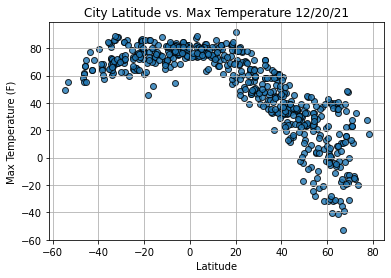

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

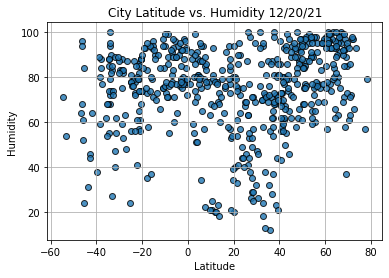

In [17]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

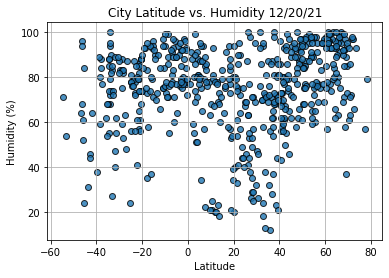

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

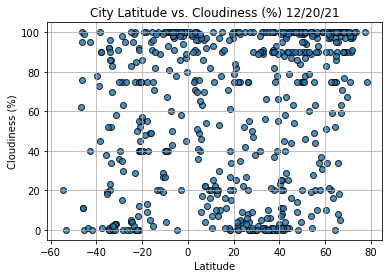

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()